In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

F:\Anaconda\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
# Load the dataset
data = pd.read_csv('AusApparalSales4thQrt2020.csv')

# Inspect the first few rows
data.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [7]:
# Check for missing or incorrect data
data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [8]:
# Dropping rows with missing values
data.dropna()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [10]:
scaler = MinMaxScaler()
data[['Unit_normalized', 'Sales_normalized']] = scaler.fit_transform(data[['Unit', 'Sales']])


In [11]:
# Example of using GroupBy for state-wise analysis
state_sales = data.groupby('State')['Sales'].sum().reset_index()


In [12]:
# Descriptive statistics for Sales and Unit columns
print("Sales Statistics:")
print(data['Sales'].describe())

print("\nUnit Statistics:")
print(data['Unit'].describe())

# Calculate mean, median, mode, and standard deviation
sales_mean = data['Sales'].mean()
sales_median = data['Sales'].median()
sales_mode = data['Sales'].mode()[0]
sales_std = data['Sales'].std()

print(f"Sales - Mean: {sales_mean}, Median: {sales_median}, Mode: {sales_mode}, Std Dev: {sales_std}")


Sales Statistics:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Unit Statistics:
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64
Sales - Mean: 45013.5582010582, Median: 35000.0, Mode: 22500, Std Dev: 32253.506943966317


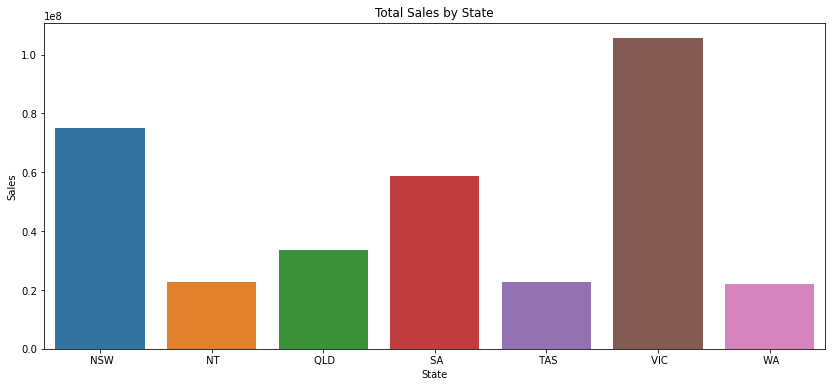

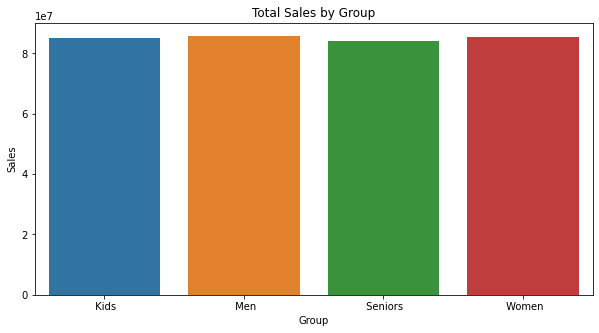

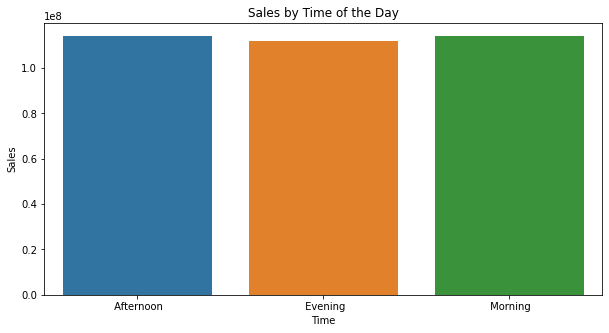

In [13]:
# State-wise sales bar plot
plt.figure(figsize=(14, 6))
sns.barplot(x='State', y='Sales', data=state_sales)
plt.title('Total Sales by State')
plt.show()

# Group-wise sales analysis
group_sales = data.groupby('Group')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Group', y='Sales', data=group_sales)
plt.title('Total Sales by Group')
plt.show()

# Time-of-the-day analysis
time_sales = data.groupby('Time')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Time', y='Sales', data=time_sales)
plt.title('Sales by Time of the Day')
plt.show()
